In [25]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('google-stock-dataset-Monthly.csv')


In [27]:
df.head

<bound method NDFrame.head of      Unnamed: 0        Date   Price    High     Low   Close      Volume  \
0             0  2013-05-01   20.60   23.04   20.43   21.80  1974715308   
1             1  2013-06-01   21.85   22.79   21.20   22.03  1941280776   
2             2  2013-07-01   22.18   23.22   21.91   22.22  2047770180   
3             3  2013-08-01   22.40   22.77   21.16   21.19  1338144516   
4             4  2013-09-01   21.38   22.67   21.37   21.92  1323615060   
..          ...         ...     ...     ...     ...     ...         ...   
115         115  2022-12-01  101.02  102.25   85.94   88.23   603127800   
116         116  2023-01-01   89.59  100.32   84.86   98.84   672897800   
117         117  2023-02-01   98.71  108.18   88.58   90.06   952580200   
118         118  2023-03-01   89.98  106.59   89.42  103.73   859911400   
119         119  2023-04-01  102.39  109.17  101.93  108.87   255598400   

     Adj Close  
0        21.80  
1        22.03  
2        22.22  
3

In [28]:
df


,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80
1,1,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03
2,2,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22
3,3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19
4,4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92
...,...,...,...,...,...,...,...,...
115,115,2022-12-01,101.02,102.25,85.94,88.23,603127800,88.23
116,116,2023-01-01,89.59,100.32,84.86,98.84,672897800,98.84
117,117,2023-02-01,98.71,108.18,88.58,90.06,952580200,90.06
118,118,2023-03-01,89.98,106.59,89.42,103.73,859911400,103.73


In [29]:
df = df.drop(columns=['Unnamed: 0','High','Low','Close','Volume','Adj Close'])
df

,Date,Price
0,2013-05-01,20.60
1,2013-06-01,21.85
2,2013-07-01,22.18
3,2013-08-01,22.40
4,2013-09-01,21.38
...,...,...
115,2022-12-01,101.02
116,2023-01-01,89.59
117,2023-02-01,98.71
118,2023-03-01,89.98


In [30]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [31]:
df.dtypes

Date      object
Price    float64
dtype: object

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

print(df.dtypes)

Date     datetime64[ns]
Price           float64
dtype: object


In [33]:
df.set_index('Date', inplace=True)

print(df)

             Price
Date              
2013-05-01   20.60
2013-06-01   21.85
2013-07-01   22.18
2013-08-01   22.40
2013-09-01   21.38
...            ...
2022-12-01  101.02
2023-01-01   89.59
2023-02-01   98.71
2023-03-01   89.98
2023-04-01  102.39

[120 rows x 1 columns]


In [34]:
# df=df.drop(columns=['Unnamed: 0'])

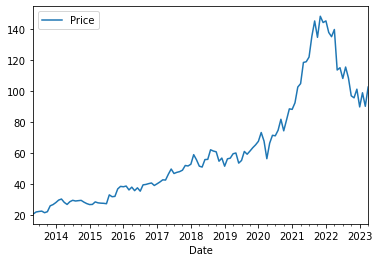

In [35]:
 df.plot();

<Figure size 864x576 with 0 Axes>

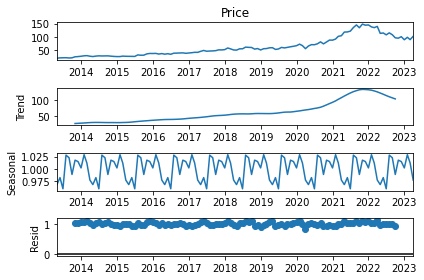

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
result = seasonal_decompose(df['Price'], model='multiplicative')  # model='mul' also works
plt.figure(figsize=(12, 8))
result.plot();

In [37]:
## handling missing values

In [38]:
df.isnull().values.any()

False

In [39]:
df.isnull().sum().sum()

0

In [40]:
df=df.dropna()

In [41]:
df

,Price
Date,
2013-05-01,20.60
2013-06-01,21.85
2013-07-01,22.18
2013-08-01,22.40
2013-09-01,21.38
...,...
2022-12-01,101.02
2023-01-01,89.59
2023-02-01,98.71


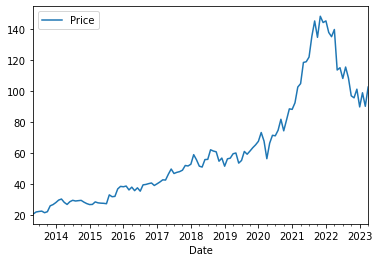

In [42]:
df[['Price']].plot().autoscale(axis='x',tight=True);

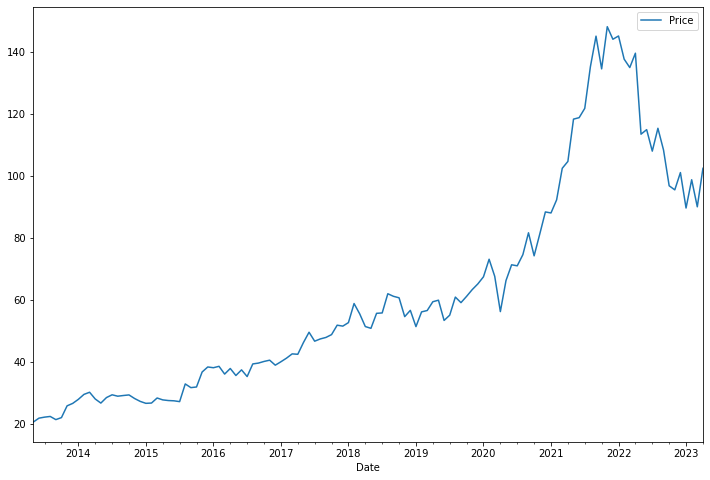

In [43]:
df[['Price']]['2013-05-01':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

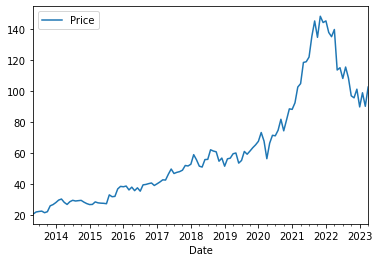

In [44]:
df.plot();

In [45]:
##### checking the stationarity by applyiing the rolling statistics 

rolmean = df.rolling(window=12).mean()

rolstd = df.rolling(window=12).std()

print(rolmean, rolstd)

                 Price
Date                  
2013-05-01         NaN
2013-06-01         NaN
2013-07-01         NaN
2013-08-01         NaN
2013-09-01         NaN
...                ...
2022-12-01  117.501667
2023-01-01  112.880000
2023-02-01  109.640000
2023-03-01  105.898333
2023-04-01  102.805833

[120 rows x 1 columns]                 Price
Date                 
2013-05-01        NaN
2013-06-01        NaN
2013-07-01        NaN
2013-08-01        NaN
2013-09-01        NaN
...               ...
2022-12-01  17.429933
2023-01-01  16.802763
2023-02-01  15.284855
2023-03-01  13.984901
2023-04-01   9.144425

[120 rows x 1 columns]


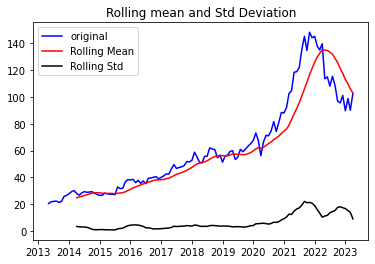

In [46]:
orig = plt.plot(df, color='blue', label= 'original')
mean = plt.plot(rolmean, color='red', label= 'Rolling Mean')
std = plt.plot(rolstd, color='black', label= 'Rolling Std' )
plt.legend(loc='best')
plt.title('Rolling mean and Std Deviation')
plt.show(block=False)

#### data is not stationary

In [47]:
#### SMA 

In [48]:
df['6-month-SMA'] = df['Price'].rolling(window=6).mean()
df['12-month-SMA'] = df['Price'].rolling(window=12).mean()

In [49]:
df.head(15)

,Price,6-month-SMA,12-month-SMA
Date,,,
2013-05-01,20.60,NaN,NaN
2013-06-01,21.85,NaN,NaN
2013-07-01,22.18,NaN,NaN
2013-08-01,22.40,NaN,NaN
2013-09-01,21.38,NaN,NaN
2013-10-01,22.03,21.740000,NaN
2013-11-01,25.82,22.610000,NaN
2013-12-01,26.61,23.403333,NaN
2014-01-01,27.91,24.358333,NaN


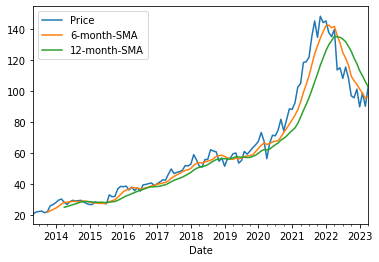

In [50]:
df.plot();

In [51]:
### EWMA 

In [25]:
df['EWMA12'] = df['Price'].ewm(span=12,adjust=False).mean()

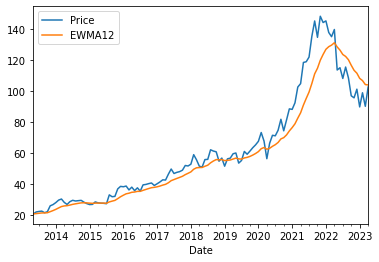

In [26]:
df[['Price','EWMA12']].plot();

In [27]:
#### DOUBLE AND TRIPLE EXPONENTIAL SMOOTHING
import pandas as pd
import numpy as np
%matplotlib inline

In [28]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', name='Date', length=120, freq='MS')

In [29]:
df.head()

,Price,6-month-SMA,12-month-SMA,EWMA12
Date,,,,
2013-05-01,20.60,NaN,NaN,20.600000
2013-06-01,21.85,NaN,NaN,20.792308
2013-07-01,22.18,NaN,NaN,21.005799
2013-08-01,22.40,NaN,NaN,21.220291
2013-09-01,21.38,NaN,NaN,21.244862


In [30]:
df = df.drop(columns=['6-month-SMA','12-month-SMA','EWMA12'])


In [31]:
df


,Price
Date,
2013-05-01,20.60
2013-06-01,21.85
2013-07-01,22.18
2013-08-01,22.40
2013-09-01,21.38
...,...
2022-12-01,101.02
2023-01-01,89.59
2023-02-01,98.71


In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Price'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Price']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,Price,EWMA12,SES12
Date,,,
2013-05-01,20.60,20.600000,20.600000
2013-06-01,21.85,20.792308,20.792308
2013-07-01,22.18,21.005799,21.005799
2013-08-01,22.40,21.220291,21.220291
2013-09-01,21.38,21.244862,21.244862


In [33]:
# Double exponential smoothing

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Price'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Price,EWMA12,SES12,DESadd12
Date,,,,
2013-05-01,20.60,20.600000,20.600000,21.017343
2013-06-01,21.85,20.792308,20.792308,22.020329
2013-07-01,22.18,21.005799,21.005799,22.713414
2013-08-01,22.40,21.220291,21.220291,23.085891
2013-09-01,21.38,21.244862,21.244862,22.325570


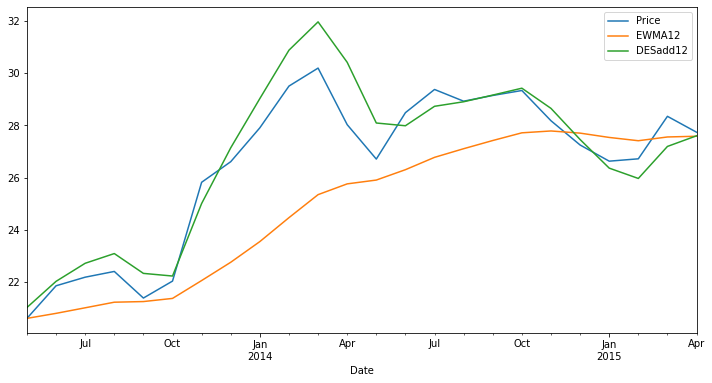

In [35]:
df[['Price','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [36]:
df['DESmul12'] = ExponentialSmoothing(df['Price'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Price,EWMA12,SES12,DESadd12,DESmul12
Date,,,,,
2013-05-01,20.60,20.600000,20.600000,21.017343,20.966024
2013-06-01,21.85,20.792308,20.792308,22.020329,22.007645
2013-07-01,22.18,21.005799,21.005799,22.713414,22.752798
2013-08-01,22.40,21.220291,21.220291,23.085891,23.152904
2013-09-01,21.38,21.244862,21.244862,22.325570,22.374137


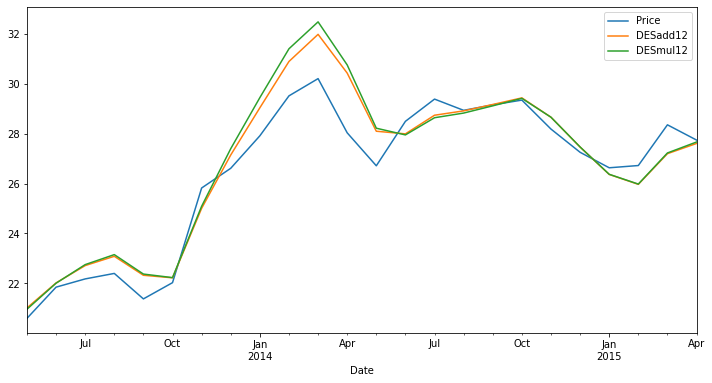

In [37]:
df[['Price','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [38]:
## TES

In [39]:
df['TESadd12'] = ExponentialSmoothing(df['Price'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Price,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Date,,,,,,
2013-05-01,20.60,20.600000,20.600000,21.017343,20.966024,20.621893
2013-06-01,21.85,20.792308,20.792308,22.020329,22.007645,21.013569
2013-07-01,22.18,21.005799,21.005799,22.713414,22.752798,20.044561
2013-08-01,22.40,21.220291,21.220291,23.085891,23.152904,25.586457
2013-09-01,21.38,21.244862,21.244862,22.325570,22.374137,23.513583


In [40]:
df['TESmul12'] = ExponentialSmoothing(df['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

/Users/jiteshkota/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Price,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Date,,,,,,,
2013-05-01,20.60,20.600000,20.600000,21.017343,20.966024,20.621893,20.891188
2013-06-01,21.85,20.792308,20.792308,22.020329,22.007645,21.013569,20.939124
2013-07-01,22.18,21.005799,21.005799,22.713414,22.752798,20.044561,21.244014
2013-08-01,22.40,21.220291,21.220291,23.085891,23.152904,25.586457,23.895243
2013-09-01,21.38,21.244862,21.244862,22.325570,22.374137,23.513583,23.412515


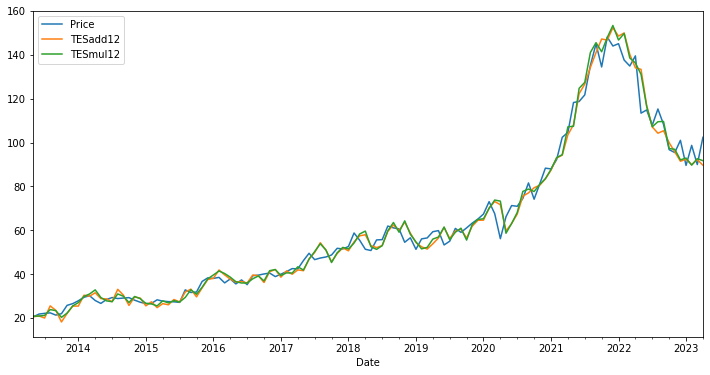

In [41]:
df[['Price','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

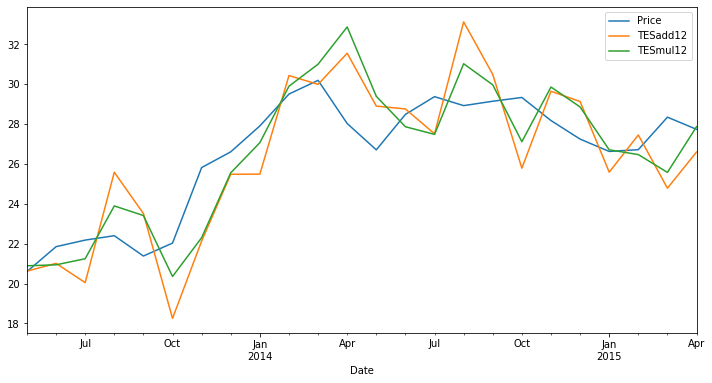

In [42]:
df[['Price','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [43]:
#### after comparing i think that the double exponential smoothing does better job than TES

In [44]:
train_data = df.iloc[:84] # Goes up to but not including 108
test_data = df.iloc[84:]

In [45]:
# # fitting the model

# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fitted_model = ExponentialSmoothing(train_data['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [46]:
# # evaluating model against test set  

# # THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
# test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [47]:
# test_predictions

In [48]:
# train_data['Price'].plot(legend=True,label='TRAIN')
# test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8));

In [49]:
# train_data['Price'].plot(legend=True,label='TRAIN')
# test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8))
# test_predictions.plot(legend=True,label='PREDICTION');

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Import the models we'll be using in this section
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [51]:
acf(df['Price'])

array([1.        , 0.9759743 , 0.96067945, 0.93906839, 0.91724426,
       0.88765355, 0.85832257, 0.82788325, 0.7942832 , 0.7560157 ,
       0.72187907, 0.68514219, 0.65220952, 0.61126469, 0.57363762,
       0.54074027, 0.50151728, 0.46529326, 0.42918691, 0.39740995,
       0.36160661])

In [52]:
# title = 'Autocorrelation: Google stock price'
# lags = 40
# plot_acf(df,title=title,lags=lags);

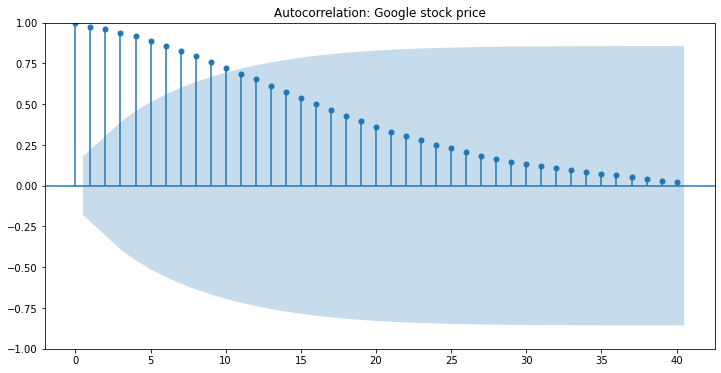

In [53]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Extract the Google stock price series from the dataframe
google_stock_price = df['Price']

# Create the ACF plot
title = 'Autocorrelation: Google stock price'
lags = 40
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(google_stock_price, ax=ax, lags=lags)
ax.set_title(title)
plt.show()


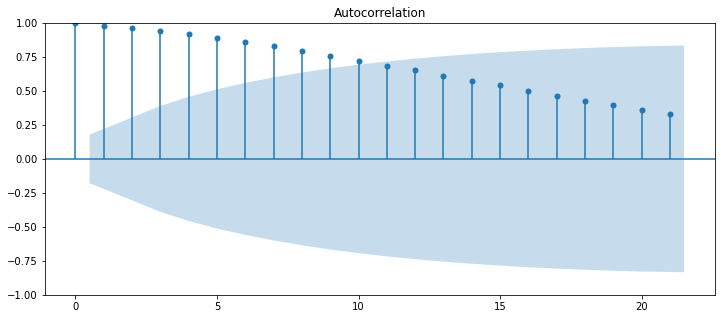

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df['Price'],ax=ax);

In [55]:
####. AUTO REGRESSIVE MODELS

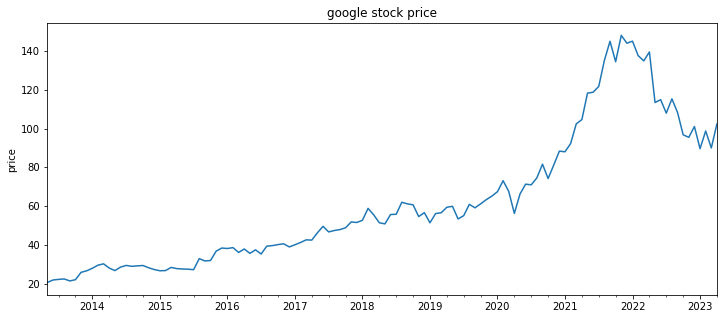

In [56]:
title='google stock price'
ylabel='price'
xlabel='' # we don't really need a label here

ax = df['Price'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [57]:
# Set one year for testing
train = df.iloc[:96]
test = df.iloc[96:]

In [58]:
## AR1 Model
from statsmodels.tsa.ar_model import AR,ARResults
#from statsmodels.tsa.ar_model import AutoReg,ARResults

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train['Price'], lags=1)
AR1fit = model.fit()

lag_order = AR1fit.params.shape[0] - 1
print(f'Lag: {lag_order}')
print(f'Coefficients:\n{AR1fit.params}')


Lag: 1
Coefficients:
const      -0.208107
Price.L1    1.023404
dtype: float64


In [61]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [62]:
predictions1

2021-05-01    106.850142
2021-06-01    109.142711
2021-07-01    111.488935
2021-08-01    113.890069
2021-09-01    116.347397
2021-10-01    118.862237
2021-11-01    121.435932
2021-12-01    124.069861
2022-01-01    126.765433
2022-02-01    129.524092
2022-03-01    132.347313
2022-04-01    135.236607
2022-05-01    138.193522
2022-06-01    141.219638
2022-07-01    144.316577
2022-08-01    147.485995
2022-09-01    150.729589
2022-10-01    154.049094
2022-11-01    157.446288
2022-12-01    160.922989
2023-01-01    164.481056
2023-02-01    168.122395
2023-03-01    171.848955
2023-04-01    175.662729
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [63]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['Price'][i]}")

predicted=106.850142 , expected=118.25
predicted=109.1427113, expected=118.72
predicted=111.4889349, expected=121.72
predicted=113.8900686, expected=135.12
predicted=116.3473974, expected=145.0
predicted=118.8622365, expected=134.45
predicted=121.4359319, expected=148.05
predicted=124.069861 , expected=144.0
predicted=126.7654334, expected=145.05
predicted=129.5240919, expected=137.59
predicted=132.3473128, expected=134.88
predicted=135.2366073, expected=139.5
predicted=138.1935216, expected=113.4
predicted=141.2196382, expected=114.86
predicted=144.3165769, expected=107.93
predicted=147.485995 , expected=115.3
predicted=150.7295888, expected=108.28
predicted=154.0490944, expected=96.76
predicted=157.4462883, expected=95.45
predicted=160.9229886, expected=101.02
predicted=164.4810563, expected=89.59
predicted=168.1223954, expected=98.71
predicted=171.848955 , expected=89.98
predicted=175.6627293, expected=102.39


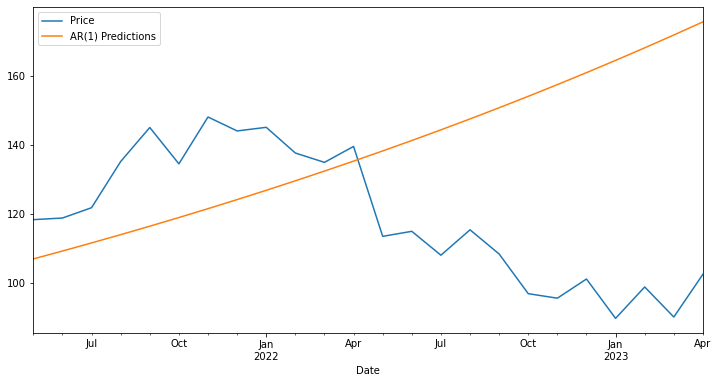

In [64]:
test['Price'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

In [65]:
#### AR2 Model

In [66]:
# # Recall that our model was already created above based on the training set
# AR2fit = model.fit(maxlag=2,method='mle')
# print(f'Lag: {AR2fit.k_ar}')
# print(f'Coefficients:\n{AR2fit.params}')

In [67]:
# AR2fit = model.fit()
# lag_order = AR2fit.params.shape[0] - 1
# print(f'Lag: {lag_order}')
# print(f'Coefficients:\n{AR2fit.params}')


In [68]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train['Price'], lags=2)
AR2fit = model.fit()

lag_order = AR2fit.params.shape[0] - 1
print(f'Lag: {lag_order}')
print(f'Coefficients:\n{AR2fit.params}')


Lag: 2
Coefficients:
const      -0.554813
Price.L1    0.868726
Price.L2    0.164896
dtype: float64


In [69]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

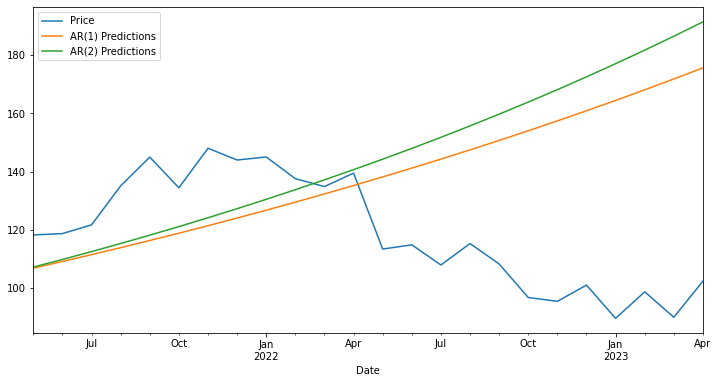

In [70]:
test['Price'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));
predictions2.plot(legend=True,figsize=(12,6));

In [71]:
## AR(P)  MODEL

In [72]:
# ARfit = model.fit(method='mle')
# print(f'Lag: {ARfit.k_ar}')
# print(f'Coefficients:\n{ARfit.params}')

In [73]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train['Price'], lags=20)
ARfit = model.fit()

lag_order = ARfit.params.shape[0] - 1
print(f'Lag: {lag_order}')
print(f'Coefficients:\n{ARfit.params}')


Lag: 20
Coefficients:
const       -1.332414
Price.L1     0.792291
Price.L2     0.034578
Price.L3     0.132706
Price.L4     0.130084
Price.L5    -0.160443
Price.L6     0.445782
Price.L7    -0.165788
Price.L8    -0.262285
Price.L9     0.216460
Price.L10    0.009836
Price.L11   -0.390638
Price.L12    0.078937
Price.L13    0.096002
Price.L14    0.135733
Price.L15    0.123469
Price.L16   -0.158831
Price.L17    0.336939
Price.L18   -0.056835
Price.L19   -0.350753
Price.L20    0.056833
dtype: float64


In [74]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(20) Predictions'

predictions20 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

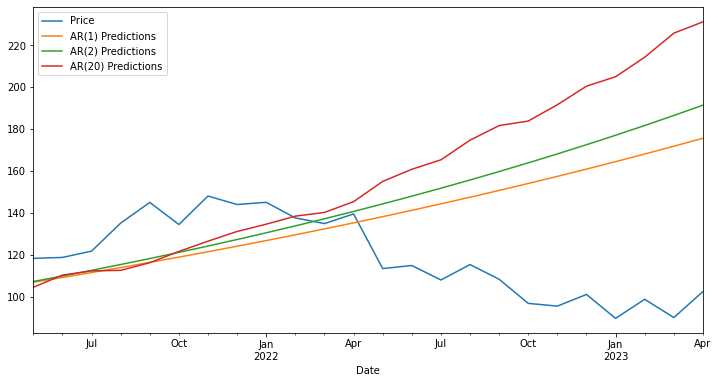

In [75]:
test['Price'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions20.plot(legend=True,figsize=(12,6));

In [76]:
## ARIMA MODELS

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders


In [79]:
auto_arima(df['Price'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -358.690
Date:                Tue, 13 Jun 2023   AIC                            727.380
Time:                        13:49:36   BIC                            741.276
Sample:                    05-01-2013   HQIC                           733.023
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2456      0.151      8.252      0.000       0.950       1.541
ar.L2         -0.4086      0.143     -2.867      0.004      -0.688      -0.129
ma.L1         -1.5316      0.094    -16.302      0.000      -1.716      -1.347
ma.L2          0.8071      0.084      9.603      0.000       0.642       0.972
sigma2        24.0835      2.297     10.485      0.000      19.582      28.585
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                70.89
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):              13.50   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""